In [1]:
import pandas as pd 
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

Read in CSV

In [2]:
mj = Path("mj_mass_shootings.csv")
mj_df = pd.read_csv(mj, infer_datetime_format=True, parse_dates=True)
pd.set_option('display.max_columns', None)

In [3]:
#Display Dataframe
mj_df.head(5)

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,mental_health_details,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year
0,Sacramento County church shooting,"Sacramento, California",2/28/22,"""A man believed to be meeting his three childr...",4,0,4,Religious,-,-,-,-,-,-,-,-,M,https://www.nytimes.com/2022/02/28/us/church-s...,-,-,38.601110,-121.418966,Mass,2022
1,Oxford High School shooting,"Oxford, Michigan",11/30/21,"Ethan Crumbley, a 15-year-old student at Oxfor...",4,7,11,School,15,-,-,-,-,semiautomatic handgun,Sig Sauer 9mm pistol,-,M,https://www.washingtonpost.com/nation/2021/11/...,-,-,42.844108,-83.259928,Mass,2021
2,San Jose VTA shooting,"San Jose, California",5/26/21,"Samuel Cassidy, 57, a Valley Transportation Au...",9,0,9,Workplace,57,yes,"Perpetrator had a history of depression, angry...",-,-,semiautomatic handguns,-,-,M,https://www.sfchronicle.com/crime/article/Mass...,https://www.nytimes.com/2021/05/26/us/what-hap...,-,37.316097,-121.888533,Mass,2021
3,FedEx warehouse shooting,"Indianapolis, Indiana",4/15/21,"Brandon Scott Hole, 19, opened fire around 11 ...",8,7,15,Workplace,19,yes,Perpetrator had been reported to police in 202...,yes,-,semiautomatic rifle,-,White,M,https://www.indystar.com/story/news/crime/2021...,https://www.nytimes.com/2021/04/19/us/indianap...,-,39.686630,-86.323130,Mass,2021
4,Orange office complex shooting,"Orange, California",3/31/21,"Aminadab Gaxiola Gonzalez, 44, allegedly opene...",4,1,5,Workplace,-,-,-,-,-,semiautomatic handgun,-,-,M,https://www.latimes.com/california/story/2021-...,-,-,33.835420,-117.853790,Mass,2021


In [4]:
#Drop Unneeded Columns
mj_df = mj_df.drop(['weapons_obtained_legally', 'where_obtained', 'sources', 'sources_additional_age'], axis=1)

In [5]:
#Check Dataframe 
mj_df.tail(5)

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,mental_health_details,weapon_type,weapon_details,race,gender,mental_health_sources,latitude,longitude,type,year
121,Shopping centers spree killings,"Palm Bay, Florida",4/23/1987,"Retired librarian William Cruse, 59, was paran...",6,14,20,Other,59,Yes,He suffered from paranoid delusions. A judge f...,"One rifle, one revolver, one shotgun","Sturm, Ruger Mini-14 semiautomatic rifle; 20-g...",white,Male,(Supreme Court of Florida Document) http://www...,28.033189,-80.642970,Spree,1987
122,United States Postal Service shooting,"Edmond, Oklahoma",8/20/1986,"Postal worker Patrick Sherrill, 44, opened fir...",15,6,21,Workplace,44,Unclear,He was worried he had inherited mental problem...,Three semiautomatic handguns,".22-caliber, two .45-caliber Colt Model 1911-A...",white,Male,http://newsok.com/sherrill-feared-mental-illne...,35.667201,-97.429370,Mass,1986
123,San Ysidro McDonald's massacre,"San Ysidro, California",7/18/1984,"James Oliver Huberty, 41, opened fire in a McD...",22,19,41,Other,41,Yes,"The day before the shooting, he tried to make ...","One semiautomatic handgun, one rifle (assault)...",9mm Browning P35 Hi-Power semiautomatic handgu...,white,Male,http://www.nctimes.com/news/local/article_2ba4...,32.552001,-117.043081,Mass,1984
124,Dallas nightclub shooting,"Dallas, Texas",6/29/1984,"Abdelkrim Belachheb, 39, opened fire at an ups...",6,1,7,Other,39,Yes,"During his last meal with his wife, he confess...",One semiautomatic handgun,9mm Smith & Wesson 459 semiautomatic handgun,white,Male,http://books.google.com/books?id=Hr3OBwP-lbUC&...,32.925166,-96.838676,Mass,1984
125,Welding shop shooting,"Miami, Florida",8/20/1982,"Junior high school teacher Carl Robert Brown, ...",8,3,11,Other,51,Yes,His second wife left him because he refused to...,One shotgun,Mossberg 500 Persuader pump-action shotgun wit...,white,Male,http://news.google.com/newspapers?id=uuYLAAAAI...,25.796491,-80.226683,Mass,1982


In [6]:
#Clean Up Location Column
mj_df['location'] = mj_df['location'].str.split(',').str[-1]

#Drop More Columns
mj_df = mj_df.drop(['weapon_details', 'mental_health_sources', 'type'], axis=1)

In [7]:
#Rename Dataframe Columns 
mj_df = mj_df.rename(columns={'case':'Title',
                                            'location':'Location',
                                            'summary':'Description',
                                            'fatalities':'Total Fatalities',
                                            'total_victims':'Total Victims',
                                            'age_of_shooter':'Age of Shooter',
                                            'location.1':'Place Type',
                                            'date':'Date',
                                            'injured':'Injured',
                                            'race':'Race',
                                            'gender':'Gender',
                                            'year':'Year',
                                            'latitude':'Latitude',
                                            'longitude':'Longitude',
                                            'weapon_type':'Weapon Type',
                                            'prior_signs_mental_health_issues':'Mental Health History?',
                                            'mental_health_details':'Mental Health Details'
                                           })

In [8]:
#Specifying Analysis Range from Year 2000 Onwards
mj_20 = mj_df['Year'] >= 2000
mj_2000 = mj_20 = mj_df[mj_20]
mj_2000.head(5)

,Title,Location,Date,Description,Total Fatalities,Injured,Total Victims,Place Type,Age of Shooter,Mental Health History?,Mental Health Details,Weapon Type,Race,Gender,Latitude,Longitude,Year
0,Sacramento County church shooting,California,2/28/22,"""A man believed to be meeting his three childr...",4,0,4,Religious,-,-,-,-,-,M,38.601110,-121.418966,2022
1,Oxford High School shooting,Michigan,11/30/21,"Ethan Crumbley, a 15-year-old student at Oxfor...",4,7,11,School,15,-,-,semiautomatic handgun,-,M,42.844108,-83.259928,2021
2,San Jose VTA shooting,California,5/26/21,"Samuel Cassidy, 57, a Valley Transportation Au...",9,0,9,Workplace,57,yes,"Perpetrator had a history of depression, angry...",semiautomatic handguns,-,M,37.316097,-121.888533,2021
3,FedEx warehouse shooting,Indiana,4/15/21,"Brandon Scott Hole, 19, opened fire around 11 ...",8,7,15,Workplace,19,yes,Perpetrator had been reported to police in 202...,semiautomatic rifle,White,M,39.686630,-86.323130,2021
4,Orange office complex shooting,California,3/31/21,"Aminadab Gaxiola Gonzalez, 44, allegedly opene...",4,1,5,Workplace,-,-,-,semiautomatic handgun,-,M,33.835420,-117.853790,2021


In [9]:
#Cleaning Blank Column Values
mj_2000 = mj_2000.replace('-', 'UNKNOWN')

In [10]:
mj_2000 = mj_2000.replace('M', 'Male')

In [11]:
#Initialise Variables Containing Casualty Data
mj_total_fatalities = mj_2000['Total Fatalities'].sum()
mj_total_injuries = mj_2000['Injured'].sum()
mj_total_victims = mj_2000['Total Victims'].sum()

Total Fatalities was 766
Total injured was 1185
Total Victims was 1951


<AxesSubplot:>

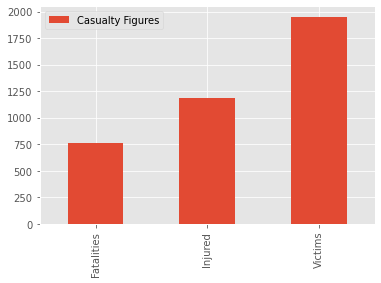

In [12]:
print(f"Total Fatalities was {mj_total_fatalities}")
print(f"Total injured was {mj_total_injuries}")
print(f"Total Victims was {mj_total_victims}")

#Create List With Casualty Data
victim_figures_list = [mj_total_fatalities, mj_total_injuries, mj_total_victims]

#Visualise casualty figures
from pandas import DataFrame
victim_df = DataFrame(data = victim_figures_list, columns = ['Casualty Figures'], index = ['Fatalities', 'Injured', 'Victims'])
victim_df.plot(kind='bar')

In [13]:
mj_2000_avg_age = mj_2000.drop(mj_2000.loc[mj_2000['Age of Shooter']=='UNKNOWN'].index)

In [14]:
mj_2000 = mj_2000_avg_age

In [15]:
#Determing Average Age of Shooter
mj_2000_avg_age['Age of Shooter'] = mj_2000_avg_age['Age of Shooter'].astype(int)
mj_2000_avg_age.dtypes
average_shooter_age = mj_2000_avg_age['Age of Shooter'].mean()
average_shooter_age = np.round(average_shooter_age, decimals=0)
average_shooter_age = average_shooter_age.astype(int)
average_shooter_age
print(f"Average age of mass shooter is {average_shooter_age}")

Average age of mass shooter is 33


#TO DO NEXT:
- total shootings due to mental illness
- total shootings due to race
- total shootings due to both
- finish assignment

<AxesSubplot:title={'center':'Shootings Per State'}>

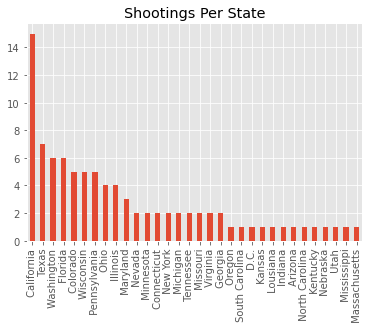

In [16]:
#Plotting Shootings Per State
mj_2000['Location'].value_counts().plot(kind='bar', title='Shootings Per State')

<AxesSubplot:title={'center':'Top 5 Most Dangerous States'}>

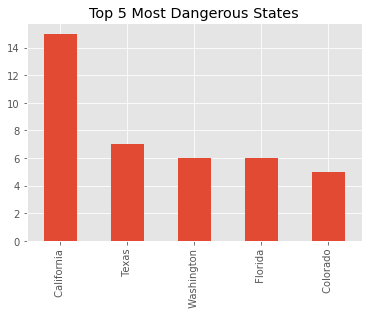

In [17]:
#Plotting Top 5 Most Frequent Shooting Locations
mj_2000['Location'].value_counts().head(5).plot(kind='bar', title='Top 5 Most Dangerous States')

In [18]:
#Mass Shootings Counts Per State
mj_2000['Location'].value_counts().head(10)

 California      15
 Texas            7
 Washington       6
 Florida          6
 Colorado         5
 Wisconsin        5
 Pennsylvania     5
 Ohio             4
 Illinois         4
 Maryland         3
Name: Location, dtype: int64

In [19]:
#Cleaning Mental Illness Column Values 
mj_2000['Mental Health History?'].replace('yes', 'Yes', inplace=True)
mj_2000['Mental Health History?'].replace('no', 'No', inplace=True)
mj_2000['Mental Health History?'].replace('unknown', 'UNKNOWN', inplace=True)
mj_2000['Mental Health History?'].replace('UNKNOWN', 'Unclear', inplace=True)
mj_2000['Mental Health History?'].replace('TBD', 'Unclear', inplace=True)
mj_2000['Mental Health History?'].replace('Unknown', 'Unclear', inplace=True)

<AxesSubplot:title={'center':'Mental Illness Related'}, ylabel='Mental Health History?'>

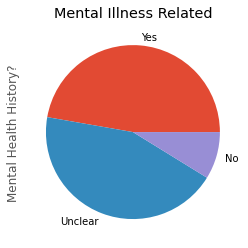

In [20]:
#Visualise Mental Illness Related Data
mj_2000['Mental Health History?'].value_counts().plot(kind='pie', title='Mental Illness Related')

In [21]:
#Display Value Counts
mj_2000['Mental Health History?'].value_counts()

Yes        43
Unclear    40
No          8
Name: Mental Health History?, dtype: int64

In [22]:
#Percentage of Mass Shooters with Mental Illness
percent = ((mj_2000['Mental Health History?'] == 'Yes').sum()) / (mj_2000['Mental Health History?'].value_counts().sum()) * 100
percent = np.round(percent, decimals=2)
print(f"Percentage of Mass Shooters with Mental Illness: {percent}%'") 

Percentage of Mass Shooters with Mental Illness: 47.25%'


In [23]:
mj_18 = mj_2000['Year'] == 2018
mj_2018 = mj_18 = mj_2000[mj_18]
mj_2018.head(12)

,Title,Location,Date,Description,Total Fatalities,Injured,Total Victims,Place Type,Age of Shooter,Mental Health History?,Mental Health Details,Weapon Type,Race,Gender,Latitude,Longitude,Year
19,Mercy Hospital shooting,Illinois,11/19/18,"Juan Lopez, 32, confronted his former fiancé, ...",3,0,3,Workplace,32,Unclear,UNKNOWN,semiautomatic handgun,Latino,Male,41.847667,-87.622009,2018
20,Thousand Oaks nightclub shooting,California,11/7/18,"Ian David Long, 28, dressed in black and armed...",12,22,34,Other,28,Yes,"Per the LATimes: ""Sheriff Geoff Dean said his ...",semiautomatic handgun,UNKNOWN,Male,34.176946,-118.874793,2018
21,Tree of Life synagogue shooting,Pennsylvania,10/27/18,"Robert D. Bowers, 46, shouted anti-Semitic slu...",11,6,17,Religious,46,Unclear,UNKNOWN,semiautomatic rifle; semiautomatic handguns,White,Male,40.443898,-79.921398,2018
22,Rite Aid warehouse shooting,Maryland,9/20/18,"Snochia Moseley, 26, reportedly a disgruntled ...",3,3,6,Workplace,26,Unclear,UNKNOWN,semiautomatic handgun,Black,F,39.455658,-76.208485,2018
23,T&T Trucking shooting,California,9/12/18,"Javier Casarez, 54, who was going through a bi...",5,0,5,Workplace,54,Unclear,UNKNOWN,handgun,Latino,Male,35.349388,-118.916335,2018
24,Fifth Third Center shooting,Ohio,9/6/18,"Omar Enrique Santa Perez, 29, walked into the ...",3,2,5,Workplace,29,Yes,"Perez filed a ""delusional"" lawsuit in 2017 aga...",semiautomatic handgun,Latino,Male,39.101981,-84.511782,2018
25,Capital Gazette shooting,Maryland,6/28/18,"Jarrod W. Ramos, 38, shot through the glass do...",5,2,7,Workplace,38,Unclear,UNKNOWN,shotgun,White,Male,38.994548,-76.543657,2018
26,Santa Fe High School shooting,Texas,5/18/18,"Dimitrios Pagourtzis, a 17-year-old student, o...",10,13,23,School,17,Unclear,UNKNOWN,shotgun; .38 revolver,White,Male,29.392825,-95.141972,2018
27,Waffle House shooting,Tennessee,4/22/18,"Travis Reinking, 29, opened fire around 3:30 a...",4,4,8,Other,29,Yes,Reinking had a history of erratic behavior and...,semiautomatic rifle,White,Male,36.052521,-86.616944,2018
28,Yountville veterans home shooting,California,3/9/18,"Army veteran Albert Cheung Wong, 36, stormed a...",3,0,3,Workplace,36,Yes,Wong had served in Afghanistan and had a histo...,semiautomatic rifle; shotgun,Asian,Male,38.392496,-122.366528,2018


<AxesSubplot:xlabel='Year'>

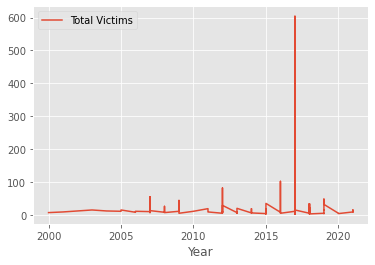

In [28]:
mj_2000.plot(kind='line', x='Year', y='Total Victims')